In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
import seaborn
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D



In [5]:
file = files.upload()

Saving user_resources.csv to user_resources.csv


In [6]:
resources = pd.read_csv("_Resources__202403062247.csv")
resources_tag = pd.read_csv("_Resources_tags__202403062248.csv")
tags = pd.read_csv("_Tags__202403062248.csv")
user_rating= pd.read_csv("_UserResourceInteraction__202403062248.csv")
users = pd.read_csv("users_202403062248.csv")
user_tag_slice = pd.read_csv("user_resources.csv")

In [7]:
resources.head()

,resource_id,name,description,resource_image,resource_file,created_at,uploaded_by_id
0,2,Introduction to Computer Science,An introductory course covering the fundamenta...,NaN,NaN,2024-03-01 13:51:38.763 +0545,24
1,3,Computer Networking Fundamentals,Fundamental concepts of computer networking in...,NaN,NaN,2024-03-01 13:51:38.763 +0545,24
2,4,Web Development Basics,Basic concepts and principles of web developme...,NaN,NaN,2024-03-01 13:51:38.763 +0545,24
3,5,Deep Learning Fundamentals,Fundamental principles and techniques of deep ...,NaN,NaN,2024-03-01 13:51:38.763 +0545,24
4,6,Computer Security Fundamentals,Fundamental concepts of computer security incl...,NaN,NaN,2024-03-01 13:51:38.763 +0545,24


In [8]:
tags.head()

,tag_id,tag_name
0,1,Programming
1,2,Computer Science
2,3,Algorithms
3,4,Networking
4,5,Computer Networks


In [9]:
resources_tag.head()


,id,resources_id,tags_id
0,3,2,1
1,4,2,2
2,5,2,3
3,6,3,2
4,7,3,4


In [10]:
user_rating.head()

,id,rating,resource_id,user_id
0,1,3.89,4,2
1,2,2.45,6,2
2,3,4.76,8,2
3,4,1.99,14,2
4,6,3.89,4,2


In [11]:
users.head()

,id,password,date_joined,last_login,email,first_name,last_name,age,address,phone_number,is_active,is_admin,is_staff,profile_pic
0,1,pbkdf2_sha256$720000$sVUNoCRMhFsoR36S1ex11g$AZ...,2024-03-01 13:46:39.385 +0545,2024-03-01 15:33:49.268 +0545,admin@admin.com,ad,min,12,ktm,999.0,True,True,True,/upload/profile_pic/default/Default-Profile-Pi...
1,2,password1,2024-03-06 21:38:48.422 +0545,2024-03-06 21:38:48.422 +0545,user1@example.com,John,Doe,25,"123 Main St, City",NaN,True,False,False,/upload/profile_pic/default/Default-Profile-Pi...
2,3,password2,2024-03-06 21:38:48.422 +0545,2024-03-06 21:38:48.422 +0545,user2@example.com,Jane,Doe,30,"456 Elm St, Town",NaN,True,False,False,/upload/profile_pic/default/Default-Profile-Pi...
3,4,password3,2024-03-06 21:38:48.422 +0545,2024-03-06 21:38:48.422 +0545,user3@example.com,Alice,Smith,40,"789 Oak St, Village",NaN,True,False,False,/upload/profile_pic/default/Default-Profile-Pi...
4,5,password4,2024-03-06 21:38:48.422 +0545,2024-03-06 21:38:48.422 +0545,user4@example.com,Bob,Johnson,22,"101 Pine St, Hamlet",NaN,True,False,False,/upload/profile_pic/default/Default-Profile-Pi...


In [12]:
user_tag_slice = pd.read_csv("user_resources.csv")

In [13]:
user_tag_slice.head()

,Unnamed: 0,user_id,resource_id,rating,AI,Advanced Cybersecurity,Advanced NLP,Advanced Networking,Advanced Programming,Algorithms,...,Vue.js,Vulnerability Assessment,Vulnerability Scanning,Web App Manifests,Web Development,data analysis,data preperation,data preprocessing,iOS,iOS App Development
0,0,2,4,3.89,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,1,2,6,2.45,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,8,4.76,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2,14,1.99,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2,4,3.89,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [14]:
user_tag_slice.columns.tolist()

['Unnamed: 0',
 'user_id',
 'resource_id',
 'rating',
 'AI',
 'Advanced Cybersecurity',
 'Advanced NLP',
 'Advanced Networking',
 'Advanced Programming',
 'Algorithms',
 'Android',
 'Android App Development',
 'Angular',
 'App Development',
 'Artificial Intelligence',
 'Association Rule Mining',
 'Automation',
 'Backend',
 'CNNs',
 'CSS',
 'Classification',
 'Cloud Compliance Frameworks',
 'Cloud Computing',
 'Cloud Security',
 'Cloud Security Controls',
 'Clustering',
 'Computer Networks',
 'Computer Science',
 'Cyber Incident Response',
 'Cybersecurity',
 'Data Modeling',
 'Data Protection',
 'Data Structures',
 'Database Design',
 'Databases',
 'Deep Learning',
 'Django',
 'ETL Processes',
 'Encryption',
 'Entity Extraction',
 'File Systems',
 'Firewalls',
 'Flutter',
 'Frontend',
 'Full Stack Development',
 'HTML',
 'Hadoop',
 'Information Assurance',
 'Information Extraction',
 'Internet',
 'JavaScript',
 'Language Understanding',
 'Log Management',
 'Machine Learning',
 'Machine 

In [15]:
# prompt: rename column resource_id.1 into resource_id

user_tag_slice = user_tag_slice.drop(columns=["Unnamed: 0","resource_id"])
user_tag_slice

,user_id,rating,AI,Advanced Cybersecurity,Advanced NLP,Advanced Networking,Advanced Programming,Algorithms,Android,Android App Development,...,Vue.js,Vulnerability Assessment,Vulnerability Scanning,Web App Manifests,Web Development,data analysis,data preperation,data preprocessing,iOS,iOS App Development
0,2,3.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,2,2.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,4.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,1.99,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,3.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,20,4.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,20,3.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,21,2.56,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,21,4.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:

columns = user_tag_slice .columns.tolist()

columns.remove("rating")
columns.remove('user_id')

for column in columns:
  print(column)
  user_tag_slice[column] = user_tag_slice[column].mul(user_tag_slice["rating"],axis=0)

user_tag_slice.head()


AI
Advanced Cybersecurity
Advanced NLP
Advanced Networking
Advanced Programming
Algorithms
Android
Android App Development
Angular
App Development
Artificial Intelligence
Association Rule Mining
Automation
Backend
CNNs
CSS
Classification
Cloud Compliance Frameworks
Cloud Computing
Cloud Security
Cloud Security Controls
Clustering
Computer Networks
Computer Science
Cyber Incident Response
Cybersecurity
Data Modeling
Data Protection
Data Structures
Database Design
Databases
Deep Learning
Django
ETL Processes
Encryption
Entity Extraction
File Systems
Firewalls
Flutter
Frontend
Full Stack Development
HTML
Hadoop
Information Assurance
Information Extraction
Internet
JavaScript
Language Understanding
Log Management
Machine Learning
Machine Translation
Machine Vision
Memory Management
Mobile UI/UX
Mobile-First Development
NLP
NLP with Deep Learning
Named Entity Recognition
Network Automation Tools
Network Security Policies
Network Traffic Analysis
Network Virtualization
Networking
Neural Mach

,user_id,rating,AI,Advanced Cybersecurity,Advanced NLP,Advanced Networking,Advanced Programming,Algorithms,Android,Android App Development,...,Vue.js,Vulnerability Assessment,Vulnerability Scanning,Web App Manifests,Web Development,data analysis,data preperation,data preprocessing,iOS,iOS App Development
0,2,3.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.89,NaN,NaN,NaN,NaN,NaN
1,2,2.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,4.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,1.99,NaN,NaN,NaN,1.99,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,3.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.89,NaN,NaN,NaN,NaN,NaN


In [17]:
user_tag_slice = user_tag_slice.groupby(by="user_id").mean()
user_tag_slice = user_tag_slice.fillna(value=0)
user_tag_slice.head()

,rating,AI,Advanced Cybersecurity,Advanced NLP,Advanced Networking,Advanced Programming,Algorithms,Android,Android App Development,Angular,...,Vue.js,Vulnerability Assessment,Vulnerability Scanning,Web App Manifests,Web Development,data analysis,data preperation,data preprocessing,iOS,iOS App Development
user_id,,,,,,,,,,,,,,,,,,,,,
2,3.272500,0.00,0.00,0.00,1.99,0.0,0.00,0.00,0.0,0.00,...,0.00,0.00,0.0,0.00,3.89,0.00,0.00,0.00,0.00,0.0
3,4.133333,3.21,0.00,0.00,0.00,0.0,0.00,0.00,0.0,4.87,...,4.87,0.00,0.0,4.87,0.00,0.00,0.00,0.00,0.00,0.0
4,3.152500,0.00,4.32,0.00,4.32,0.0,1.54,0.00,0.0,0.00,...,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0
5,3.322000,0.00,0.00,0.00,1.56,0.0,0.00,3.87,0.0,0.00,...,0.00,4.32,0.0,0.00,0.00,0.00,0.00,0.00,3.87,0.0
6,3.355000,0.00,0.00,3.76,0.00,0.0,0.00,0.00,0.0,0.00,...,0.00,0.00,0.0,0.00,2.11,2.99,2.99,2.99,0.00,0.0


In [18]:
for column in user_tag_slice.columns:
    unique_values = user_tag_slice[column].value_counts()
    print(f"values count in {column}:")
    print(unique_values)
    print()

values count in rating:
2.657500    2
3.326667    2
3.272500    1
3.155000    1
3.762500    1
3.546667    1
3.416000    1
3.435000    1
3.344000    1
3.237500    1
3.366000    1
4.133333    1
2.992000    1
3.850000    1
3.355000    1
3.322000    1
3.152500    1
2.916667    1
Name: rating, dtype: int64

values count in AI:
0.00    14
1.54     2
3.21     1
2.56     1
4.32     1
2.21     1
Name: AI, dtype: int64

values count in Advanced Cybersecurity:
0.00    16
1.99     2
4.32     1
1.87     1
Name: Advanced Cybersecurity, dtype: int64

values count in Advanced NLP:
0.00    17
3.76     1
1.54     1
2.45     1
Name: Advanced NLP, dtype: int64

values count in Advanced Networking:
0.00    13
1.99     3
4.32     1
1.56     1
1.87     1
4.65     1
Name: Advanced Networking, dtype: int64

values count in Advanced Programming:
0.00    17
4.65     2
4.76     1
Name: Advanced Programming, dtype: int64

values count in Algorithms:
0.000    12
4.485     2
1.540     1
2.775     1
4.760     1
2.990

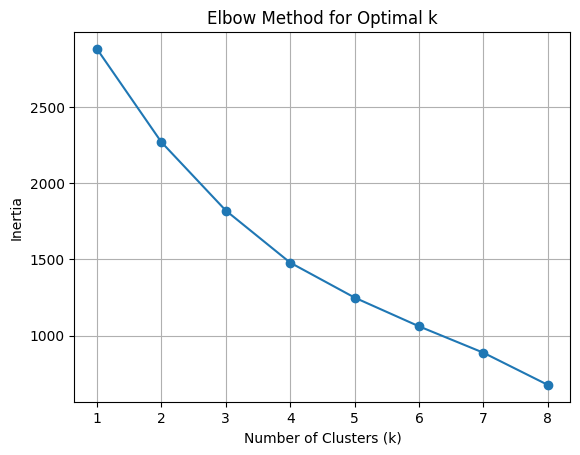

In [19]:
###########################################################


# K-MEAN CLUSTURING

# Elbow Method  for determination of clusters

# poting against sumofsquare(inertia) vs number of clusters

inertia = []

for k in range(1,9):
  k_means  = KMeans(n_clusters=k,n_init=10,random_state=42)
  k_means.fit(user_tag_slice)
  inertia.append(k_means.inertia_)

plt.plot(range(1,9), inertia, marker= 'o' )
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [20]:
kmeans = KMeans(n_clusters=4,n_init=10,random_state=42)
users_with_label = pd.DataFrame(user_tag_slice)
users_with_label["label"]=kmeans.fit_predict(user_tag_slice)
users_with_label


,rating,AI,Advanced Cybersecurity,Advanced NLP,Advanced Networking,Advanced Programming,Algorithms,Android,Android App Development,Angular,...,Vulnerability Assessment,Vulnerability Scanning,Web App Manifests,Web Development,data analysis,data preperation,data preprocessing,iOS,iOS App Development,label
user_id,,,,,,,,,,,,,,,,,,,,,
2,3.272500,0.00,0.00,0.00,1.99,0.00,0.000,0.00,0.0,0.00,...,0.00,0.0,0.00,3.89,0.00,0.00,0.00,0.00,0.0,2
3,4.133333,3.21,0.00,0.00,0.00,0.00,0.000,0.00,0.0,4.87,...,0.00,0.0,4.87,0.00,0.00,0.00,0.00,0.00,0.0,3
4,3.152500,0.00,4.32,0.00,4.32,0.00,1.540,0.00,0.0,0.00,...,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0
5,3.322000,0.00,0.00,0.00,1.56,0.00,0.000,3.87,0.0,0.00,...,4.32,0.0,0.00,0.00,0.00,0.00,0.00,3.87,0.0,0
6,3.355000,0.00,0.00,3.76,0.00,0.00,0.000,0.00,0.0,0.00,...,0.00,0.0,0.00,2.11,2.99,2.99,2.99,0.00,0.0,2
7,3.850000,2.56,0.00,0.00,0.00,4.65,4.485,0.00,0.0,0.00,...,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,3
8,2.657500,0.00,1.99,0.00,1.99,0.00,0.000,0.00,0.0,0.00,...,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0
9,3.326667,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.0,0.00,...,0.00,0.0,0.00,2.45,0.00,0.00,0.00,0.00,0.0,1
10,2.992000,1.54,0.00,0.00,0.00,0.00,2.775,0.00,0.0,3.22,...,0.00,0.0,3.22,0.00,0.00,0.00,0.00,0.00,0.0,3


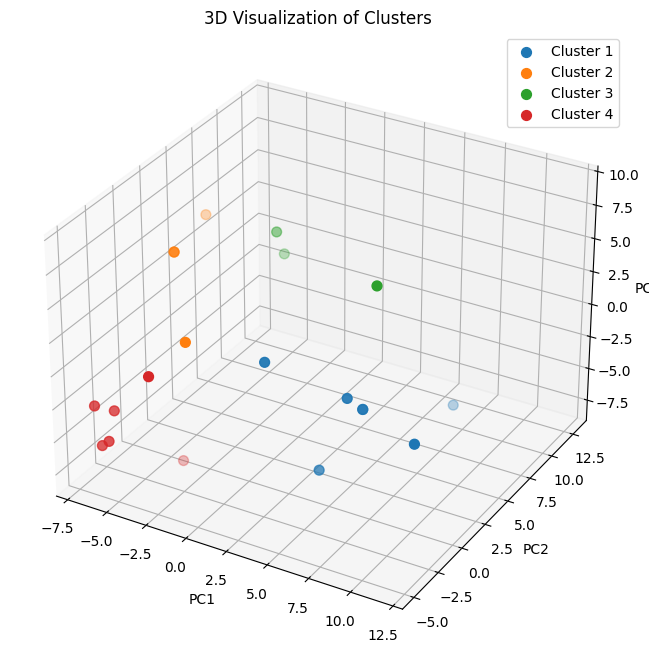

In [21]:
# prompt: can you generate me the visualization for the cluster

pca = PCA(n_components=3)
pca_data = pca.fit_transform(user_tag_slice)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

for i in range(kmeans.n_clusters):
  ax.scatter(pca_data[users_with_label["label"] == i, 0],
            pca_data[users_with_label["label"] == i, 1],
            pca_data[users_with_label["label"] == i, 2],
            s=50, label=f"Cluster {i+1}")

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D Visualization of Clusters')
ax.legend()

plt.show()


In [22]:
user_rating.head()

,id,rating,resource_id,user_id
0,1,3.89,4,2
1,2,2.45,6,2
2,3,4.76,8,2
3,4,1.99,14,2
4,6,3.89,4,2


In [23]:
# Recomendations

rating_user = user_rating.join(users_with_label['label'], on ="user_id")
rating_user.head()



,id,rating,resource_id,user_id,label
0,1,3.89,4,2,2
1,2,2.45,6,2,2
2,3,4.76,8,2,2
3,4,1.99,14,2,2
4,6,3.89,4,2,2


In [24]:
print(rating_user)

     id  rating  resource_id  user_id  label
0     1    3.89            4        2      2
1     2    2.45            6        2      2
2     3    4.76            8        2      2
3     4    1.99           14        2      2
4     6    3.89            4        2      2
..  ...     ...          ...      ...    ...
79   97    4.32            7       20      1
80   98    3.21           10       20      1
81  100    2.56            2       21      3
82  101    4.65            5       21      3
83  102    1.54            9       21      3

[84 rows x 5 columns]


In [25]:
print(rating_user.columns.tolist())

group = rating_user[['resource_id','rating','label']].groupby(by=["label","resource_id"])["rating"].agg(["mean","count"])

group.head()

['id', 'rating', 'resource_id', 'user_id', 'label']


mean  count
label resource_id                 
0     2            1.540000      1
      3            3.901667      6
      5            3.760000      1
      6            3.235000      4
      7            2.930000      2

In [26]:
# goodness evaluation (obj -> objective) is the mean rating multiplied by the count


group["obj"] = group["mean"]*group["count"]

group.head()

mean  count    obj
label resource_id                        
0     2            1.540000      1   1.54
      3            3.901667      6  23.41
      5            3.760000      1   3.76
      6            3.235000      4  12.94
      7            2.930000      2   5.86

In [27]:
group_obj = group[["obj"]].dropna()

group_obj.head()

obj
label resource_id       
0     2             1.54
      3            23.41
      5             3.76
      6            12.94
      7             5.86

In [28]:
# Assuming user_id is the input mechanism
user_id = 2
# Filter user data
user_data = rating_user[rating_user["user_id"] == user_id]
print(user_data)
user_cluster_label = user_data["label"].iloc[0]
print(user_data["label"].iloc[0])


# Get recommendations for the user's cluster
user_group_obj = group_obj.loc[user_cluster_label]
sorted_recommendations = user_group_obj.sort_values(by="obj", ascending=False).reset_index()

# Join with course details
recommendations = sorted_recommendations.join(resources[['name', 'resource_id']].set_index('resource_id'), on="resource_id")
print(recommendations.head(50))

# Display recommendations
print(f"Top recommendations for user {user_id}:")
for i, row in recommendations.iterrows():
    print(f"- {row['name']}")


   id  rating  resource_id  user_id  label
0   1    3.89            4        2      2
1   2    2.45            6        2      2
2   3    4.76            8        2      2
3   4    1.99           14        2      2
4   6    3.89            4        2      2
5   7    2.45            6        2      2
6   8    4.76            8        2      2
7   9    1.99           14        2      2
2
   resource_id    obj                            name
0            8  18.73     Database Management Systems
1            4  12.45          Web Development Basics
2           27   6.86                Machine Learning
3           16   5.30          Advanced Deep Learning
4            6   4.90  Computer Security Fundamentals
5           14   3.98    Advanced Computer Networking
Top recommendations for user 2:
- Database Management Systems
- Web Development Basics
- Machine Learning
- Advanced Deep Learning
- Computer Security Fundamentals
- Advanced Computer Networking


In [29]:
resources.head(1)

,resource_id,name,description,resource_image,resource_file,created_at,uploaded_by_id
0,2,Introduction to Computer Science,An introductory course covering the fundamenta...,NaN,NaN,2024-03-01 13:51:38.763 +0545,24


In [31]:
# sorting information



lebels  = group_obj.index.get_level_values(0).unique().tolist()
print(lebels)


recomendation = []

for x in lebels:

  sort = group_obj.loc[x].sort_values(by="obj", ascending=False).reset_index()
  join_ = sort.join(
      resources[['name', 'resource_id']].set_index('resource_id'), on="resource_id"

  )

  recomendation.append(join_['name'].rename(x))

recomendation_= pd.concat(recomendation ,axis =1)




[0, 1, 2, 3]


In [ ]:
recomendation_.head(20)

In [33]:
recomendation_.head()



,0,1,2,3
0,Computer Networking Fundamentals,Quantum Computing Basics,Database Management Systems,Deep Learning Fundamentals
1,Computer Security Fundamentals,Natural Language Processing,Web Development Basics,Introduction to Computer Science
2,Information Security,Web Development Basics,Machine Learning,Robotics and Automation
3,Mobile App Development,Deep Learning Fundamentals,Advanced Deep Learning,Advanced Computer Science
4,Ethical Hacking Techniques,Introduction to Computer Science,Computer Security Fundamentals,Advanced Web Development


In [36]:
print(recomendation_.head(2).to_numpy())

[['Computer Networking Fundamentals' 'Quantum Computing Basics'
  'Database Management Systems' 'Deep Learning Fundamentals']
 ['Computer Security Fundamentals' 'Natural Language Processing'
  'Web Development Basics' 'Introduction to Computer Science']]


In [37]:
print(np.unique(recomendation_.head(2).to_numpy()))

['Computer Networking Fundamentals' 'Computer Security Fundamentals'
 'Database Management Systems' 'Deep Learning Fundamentals'
 'Introduction to Computer Science' 'Natural Language Processing'
 'Quantum Computing Basics' 'Web Development Basics']


In [38]:
for i in range(4):
  print(np.unique(recomendation_.head(i).to_numpy()))

[]
['Computer Networking Fundamentals' 'Database Management Systems'
 'Deep Learning Fundamentals' 'Quantum Computing Basics']
['Computer Networking Fundamentals' 'Computer Security Fundamentals'
 'Database Management Systems' 'Deep Learning Fundamentals'
 'Introduction to Computer Science' 'Natural Language Processing'
 'Quantum Computing Basics' 'Web Development Basics']
['Computer Networking Fundamentals' 'Computer Security Fundamentals'
 'Database Management Systems' 'Deep Learning Fundamentals'
 'Information Security' 'Introduction to Computer Science'
 'Machine Learning' 'Natural Language Processing'
 'Quantum Computing Basics' 'Robotics and Automation'
 'Web Development Basics']


In [35]:
for i in range(7):
    print(f'{i} recomendations: {np.unique(recomendation_.head(i).to_numpy()).__len__()} resources in total')

0 recomendations: 0 resources in total
1 recomendations: 4 resources in total
2 recomendations: 8 resources in total
3 recomendations: 11 resources in total
4 recomendations: 14 resources in total
5 recomendations: 16 resources in total
6 recomendations: 17 resources in total


In [44]:
recomendation_.loc(1)[0]

0     Computer Networking Fundamentals
1       Computer Security Fundamentals
2                 Information Security
3               Mobile App Development
4           Ethical Hacking Techniques
5         Advanced Computer Networking
6                     Network Security
7          Natural Language Processing
8            Advanced Computer Science
9           Deep Learning Fundamentals
10         Database Management Systems
11            Quantum Computing Basics
12              Advanced Deep Learning
13          Full Stack Web Development
14    Introduction to Computer Science
Name: 0, dtype: object